## Import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import os
import cv2
import numpy as np
from time import time

%matplotlib inline

## Function Definition

In [4]:
def change_color_fuzzycmeans(cluster_membership, clusters):
    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img

def readimage():
    folder = 'image-cancer/'
    list_images = os.listdir(folder)
    list_img = []
    for i in list_images:
        path = folder+i
        print(path)
        img = cv2.imread(path)
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 3))
        list_img.append(rgb_img)
        
    return list_img

def bwarea(img):
    row = img.shape[0]
    col = img.shape[1]
    total = 0.0
    for r in range(row-1):
        for c in range(col-1):
            sub_total = img[r:r+2, c:c+2].mean()
            if sub_total == 255:
                total += 1
            elif sub_total == (255.0/3.0):
                total += (7.0/8.0)
            elif sub_total == (255.0/4.0):
                total += 0.25
            elif sub_total == 0:
                total += 0
            else:
                r1c1 = img[r,c]
                r1c2 = img[r,c+1]
                r2c1 = img[r+1,c]
                r2c2 = img[r+1,c+1]
                
                if (((r1c1 == r2c2) & (r1c2 == r2c1)) & (r1c1 != r2c1)):
                    total += 0.75
                else:
                    total += 0.5
    return total
            
def imclearborder(imgBW):

    radius = 2
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] 


    for idx in np.arange(len(contours)):

        cnt = contours[idx]

        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

def bwareaopen(imgBW, areaPixels):
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for idx in np.arange(len(contours)):
        area = cv2.contourArea(contours[idx])
        if (area >= 0 and area <= areaPixels):
            cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy      

def imfill(im_th):
    
    im_floodfill = im_th.copy()

    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    im_floodfill_inv = cv2.bitwise_not(im_floodfill)


    im_out = im_th | im_floodfill_inv
    
    return im_out

In [5]:
list_img = readimage()

n_data = len(list_img)

image-cancer/756_HC.png
image-cancer/708_2HC.png
image-cancer/685_HC.png
image-cancer/658_HC.png
image-cancer/802_HC.png
image-cancer/751_2HC.png
image-cancer/715_HC.png
image-cancer/753_HC.png
image-cancer/681_HC.png
image-cancer/770_HC.png
image-cancer/804_HC.png
image-cancer/739_HC.png
image-cancer/769_HC.png
image-cancer/698_HC.png
image-cancer/761_HC.png
image-cancer/673_2HC.png
image-cancer/746_2HC.png
image-cancer/790_HC.png
image-cancer/709_2HC.png
image-cancer/780_HC.png
image-cancer/768_HC.png
image-cancer/659_HC.png
image-cancer/679_HC.png
image-cancer/771_HC.png
image-cancer/751_HC.png
image-cancer/706_HC.png
image-cancer/773_HC.png
image-cancer/750_HC.png
image-cancer/783_HC.png
image-cancer/670_HC.png
image-cancer/786_HC.png
image-cancer/758_HC.png
image-cancer/735_HC.png
image-cancer/671_HC.png
image-cancer/736_HC.png
image-cancer/799_HC.png
image-cancer/653_HC.png
image-cancer/718_HC.png
image-cancer/717_HC.png
image-cancer/710_HC.png
image-cancer/689_HC.png
image-cance

In [6]:
k=0;
for index,rgb_img in enumerate(list_img):
    k=rgb_img
    break

In [7]:


k.shape

(432000, 3)

## Process

Image 1
Fuzzy time for cluster 2
4.874556541442871 seconds
Bwarea : 15112.25

Fuzzy time for cluster 3
15.610365390777588 seconds
Bwarea : 21557.25

Fuzzy time for cluster 6
56.434892654418945 seconds
Bwarea : 6635.5



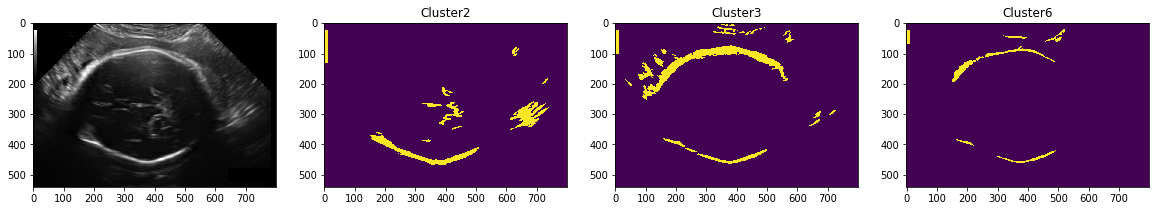


Image 2
Fuzzy time for cluster 2
5.063333511352539 seconds
Bwarea : 65924.0

Fuzzy time for cluster 3
13.268107175827026 seconds
Bwarea : 16722.5

Fuzzy time for cluster 6
72.43034768104553 seconds
Bwarea : 2508.25



<Figure size 432x288 with 0 Axes>

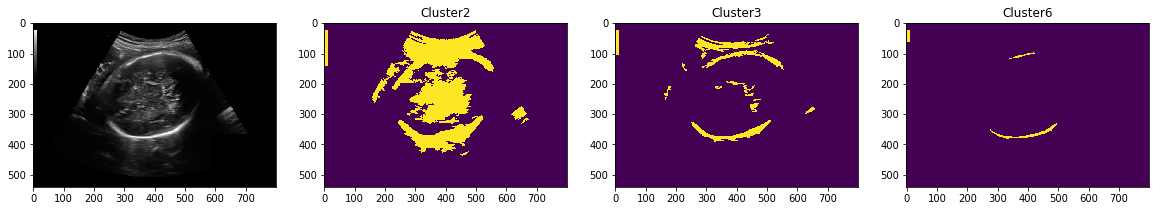


Image 3
Fuzzy time for cluster 2
5.509015321731567 seconds
Bwarea : 61595.25

Fuzzy time for cluster 3
16.780481100082397 seconds
Bwarea : 16197.5

Fuzzy time for cluster 6
48.82705092430115 seconds
Bwarea : 4546.0



<Figure size 432x288 with 0 Axes>

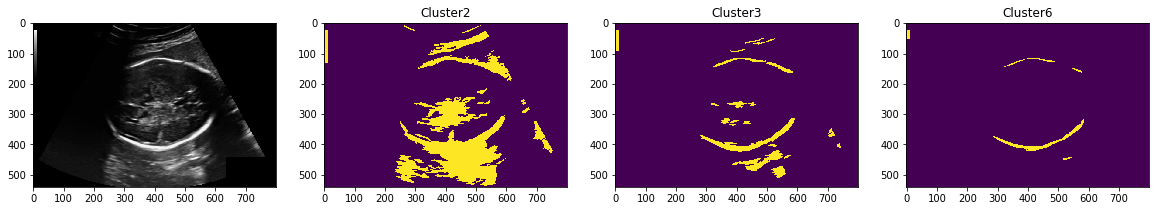


Image 4
Fuzzy time for cluster 2
6.2611002922058105 seconds
Bwarea : 1393.75

Fuzzy time for cluster 3
10.132916688919067 seconds
Bwarea : 40141.75

Fuzzy time for cluster 6
74.9400405883789 seconds
Bwarea : 2390.0



<Figure size 432x288 with 0 Axes>

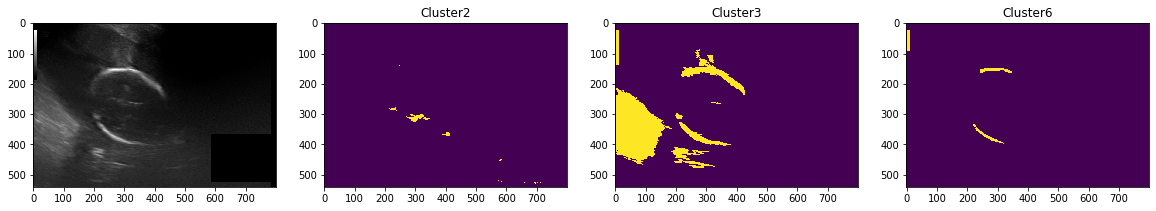


Image 5
Fuzzy time for cluster 2
5.167093992233276 seconds
Bwarea : 15520.75

Fuzzy time for cluster 3
14.794942140579224 seconds
Bwarea : 13346.5

Fuzzy time for cluster 6
61.09741449356079 seconds
Bwarea : 6875.0



<Figure size 432x288 with 0 Axes>

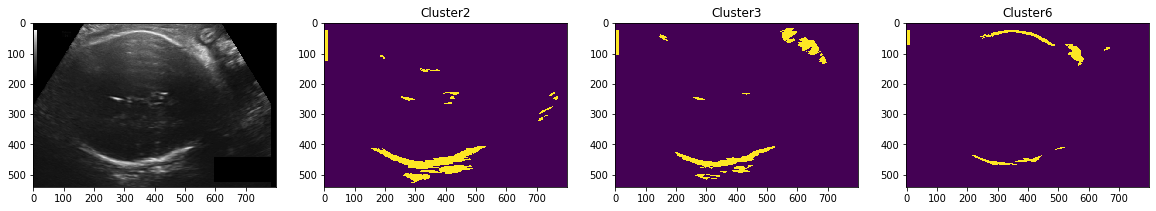


Image 6
Fuzzy time for cluster 2
5.179766654968262 seconds
Bwarea : 49358.25

Fuzzy time for cluster 3
17.13423776626587 seconds
Bwarea : 13485.0

Fuzzy time for cluster 6
62.48354387283325 seconds
Bwarea : 2061.75



<Figure size 432x288 with 0 Axes>

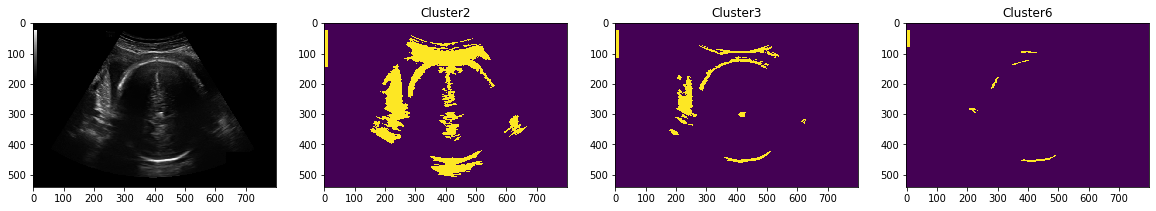


Image 7
Fuzzy time for cluster 2
5.641501188278198 seconds
Bwarea : 50143.5

Fuzzy time for cluster 3
15.179483413696289 seconds
Bwarea : 13523.5

Fuzzy time for cluster 6
52.577388286590576 seconds
Bwarea : 2953.25



<Figure size 432x288 with 0 Axes>

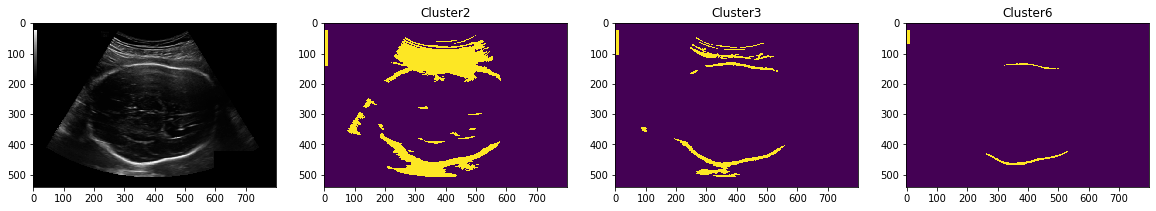


Image 8
Fuzzy time for cluster 2
4.833150386810303 seconds
Bwarea : 5076.0

Fuzzy time for cluster 3
14.738295316696167 seconds
Bwarea : 7081.25

Fuzzy time for cluster 6
39.62341117858887 seconds
Bwarea : 3871.0



<Figure size 432x288 with 0 Axes>

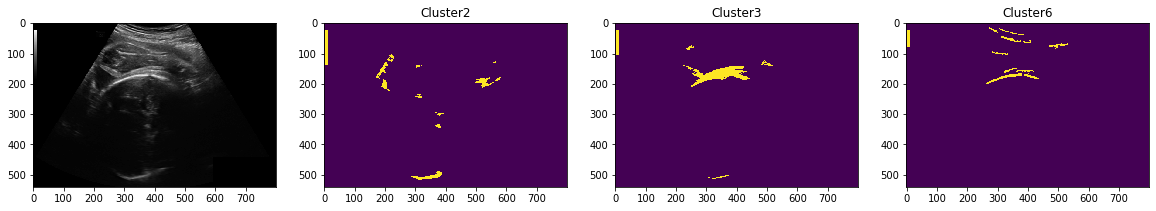


Image 9
Fuzzy time for cluster 2
4.5927653312683105 seconds
Bwarea : 18745.5

Fuzzy time for cluster 3
19.184104204177856 seconds
Bwarea : 14724.0

Fuzzy time for cluster 6
47.98888826370239 seconds
Bwarea : 7305.75



<Figure size 432x288 with 0 Axes>

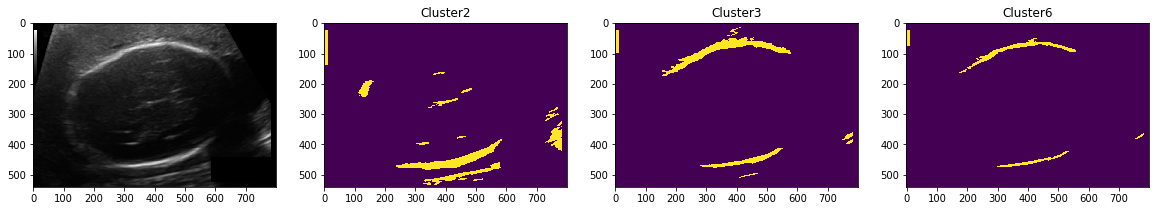


Image 10
Fuzzy time for cluster 2
4.687267303466797 seconds
Bwarea : 19086.75

Fuzzy time for cluster 3
13.32602572441101 seconds
Bwarea : 13722.75

Fuzzy time for cluster 6
65.13546895980835 seconds
Bwarea : 4165.5



<Figure size 432x288 with 0 Axes>

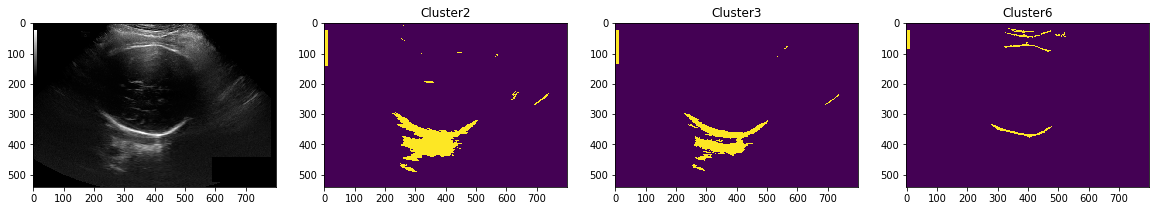


Image 11
Fuzzy time for cluster 2
10.437130212783813 seconds
Bwarea : 122075.25

Fuzzy time for cluster 3
12.154546022415161 seconds
Bwarea : 20351.75



KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

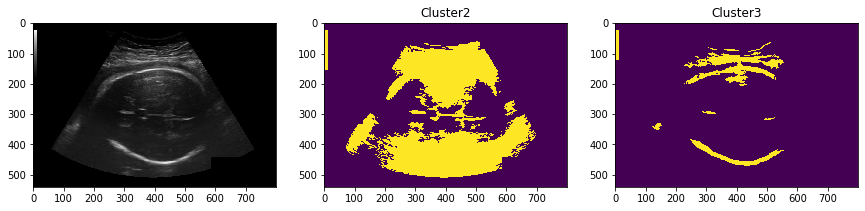

In [9]:
clusters = [2,3,6]

# looping every images
for index,rgb_img in enumerate(list_img):
    img = np.reshape(rgb_img, (540,800,3)).astype(np.uint8)
    shape = np.shape(img)
    
    
    # initialize graph
    plt.figure(figsize=(20,20))
    plt.subplot(1,4,1)
    plt.imshow(img)
    # looping every cluster     
    print('Image '+str(index+1))
    for i,cluster in enumerate(clusters):
            

        new_time = time()

        
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        rgb_img.T, cluster, 2, error=0.005, maxiter=1000, init=None,seed=42)

        new_img = change_color_fuzzycmeans(u,cntr)
        
        fuzzy_img = np.reshape(new_img,shape).astype(np.uint8)
        
        ret, seg_img = cv2.threshold(fuzzy_img,np.max(fuzzy_img)-1,255,cv2.THRESH_BINARY)
        
        print('Fuzzy time for cluster',cluster)
        print(time() - new_time,'seconds')
        seg_img_1d = seg_img[:,:,1]
        
        
        bwfim1 = bwareaopen(seg_img_1d, 100)
        bwfim2 = imclearborder(bwfim1)
        bwfim3 = imfill(bwfim2)
        
        print('Bwarea : '+str(bwarea(bwfim3)))
        print()

        plt.subplot(1,4,i+2)
        plt.imshow(bwfim3)
        name = 'Cluster'+str(cluster)
        plt.title(name)
    plt.show()
    name = 'segmented'+str(index)+'.png'
    plt.savefig(name)
    print()
    